In [10]:
import pandas       #Изучение кластерного анализа k-Mean
import numpy as np
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage import img_as_float
import pylab
import math
from sklearn.metrics import mean_squared_error
from IPython.display import Image

image = imread('C:/Users/arami/Documents/MyDatabase/dog.jpg')
matrImage = img_as_float(image)# превращение в вектор

x, y, z = matrImage.shape#разбили на высоту, ширину, количество пикселей
objects_features_matrix = np.reshape(matrImage, (x * y, z))

display(Image('https://yandex.by/images/search?pos=39&from=tabbar&img_url=https%3A%2F%2Fget.wallhere.com%2Fphoto%2F1600x1200-px-animal-cute-dog-dogs-Frendly-pet-1642625.jpg&text=собака&rpt=simage.jpeg', 
              width = 400)) 

FileNotFoundError: No such file or directory: 'url =https://yandex.by/images/search?pos=19&from=tabbar&img_url=https%3A%2F%2Fi.artfile.ru%2F2880x1800_797812_%5Bwww.ArtFile.ru%5D.jpg&text=собака&rpt=simage'

FileNotFoundError: No such file or directory: 'url =https://yandex.by/images/search?pos=19&from=tabbar&img_url=https%3A%2F%2Fi.artfile.ru%2F2880x1800_797812_%5Bwww.ArtFile.ru%5D.jpg&text=собака&rpt=simage'

<IPython.core.display.Image object>

19.447865863085493 19.427838992001938 3


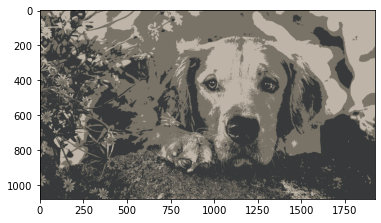

In [8]:
nClust = 3 # количество кластеров
cluster = KMeans(init='k-means++', random_state=241, n_clusters = nClust) #обучаем кластерным анализом k-Means
cluster.fit(objects_features_matrix)#количество кластеров это количество цветов
    
df = pandas.DataFrame(objects_features_matrix)# преобразовываем нашу матрицу в датафрейм
df['cluster'] = cluster.predict(df) #добавляем столбец сluster

#меняем пиксели в кластерах на медиану или средние значение
df_mean_groups = df.groupby('cluster').mean()
df_median_groups = df.groupby('cluster').median()
    
df_mean = df.copy()
df_median = df.copy()
    
for i in range(nClust):
    df_mean.loc[df_mean['cluster']==i, [0, 1, 2]] = df_mean_groups.loc[i].tolist()
    df_median.loc[df_mean['cluster']==i, [0, 1, 2]] = df_median_groups.loc[i].tolist()
        
MSE = mean_squared_error(df[[0,1,2]], df_mean[[0,1,2]])# MSE - среднеквадратичная ошибка
PSNRmean = ((20 * math.log10(1)) - (10 * math.log10(MSE)))
MSE = mean_squared_error(df[[0,1,2]], df_median[[0,1,2]])
PSNRmedian = ((20 * math.log10(1)) - (10 * math.log10(MSE)))
    
print(PSNRmean, PSNRmedian, nClust)   

def recreate_image(codebook, labels, w, h): #преобразовываем обратно в картинку
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image


image_done = recreate_image(cluster.cluster_centers_, df['cluster'], x, y)
pylab.imshow(image_done)

In [23]:
bb = cluster.cluster_centers_
bb[0]

array([0.12724015, 0.39195402, 0.13774205])

In [9]:
print cluster.labels_[961]#можем определить какой пиксель относиться к какому кластеру
print objects_features_matrix[4].mean()
print np.median(objects_features_matrix[56])

7
0.17385620915032676
0.0196078431372549
